# Housing Price Prediction - Linear Regression Example

This notebook will explore a complete machine learning workflow for predicting car prices using linear regression. We'll cover:
- Data loading and preparation
- Exploratory data analysis
- Training/validation/test split
- Linear regression implementation
- Feature engineering
- Model validation using RMSE
- Regularization and hyperparameter tuning

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for skewness
from scipy.stats import skew


%matplotlib inline

## Data Loading and Preparation

First, let's load our car price dataset and prepare it for analysis.

In [2]:
data = 'https://gist.githubusercontent.com/inoccu/139294a0476751fbfd1cde4110edbbab/raw/eb2d487390a1d0ca29d2c0f3fef947a2a3505382/housing.csv'

Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [3]:
# Download the data using wget
# !wget $data -O dataset.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Display the column names to see what features we have
print("Original column names:")
print(df.columns)

# Clean up column names:
# - Convert to lowercase
# - Replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("\nCleaned column names:")
print(df.columns)

Original column names:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Cleaned column names:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df.dtypes

# chas is categorical variable (0 or 1)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## Exploratory Data Analysis (EDA)

Let's explore our dataset to better understand our features and target variable (medv).

In [6]:
# Display information about each column in our dataset
print("Column information:")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"First 5 unique values: {df[col].unique()[:5]}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Column information:

Column: crim
First 5 unique values: [0.00632 0.02731 0.02729 0.03237 0.06905]
Number of unique values: 504
--------------------------------------------------

Column: zn
First 5 unique values: [18.   0.  12.5 75.  21. ]
Number of unique values: 26
--------------------------------------------------

Column: indus
First 5 unique values: [2.31 7.07 2.18 7.87 8.14]
Number of unique values: 76
--------------------------------------------------

Column: chas
First 5 unique values: [0 1]
Number of unique values: 2
--------------------------------------------------

Column: nox
First 5 unique values: [0.538 0.469 0.458 0.524 0.499]
Number of unique values: 81
--------------------------------------------------

Column: rm
First 5 unique values: [6.575 6.421 7.185 6.998 7.147]
Number of unique values: 446
--------------------------------------------------

Column: age
First 5 unique values: [65.2 78.9 61.1 45.8 54.2]
Number of unique values: 356
-----------------------------

Distribution of price

<Axes: xlabel='medv', ylabel='Count'>

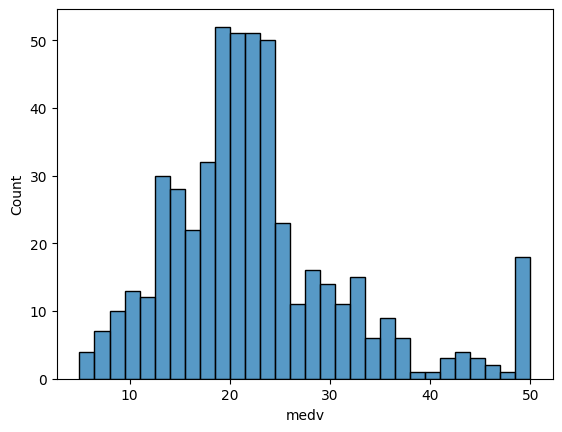

In [7]:
sns.histplot(df.medv, bins=30)

In [8]:
#Checking for skewness
print("Skewness of 'medv':", skew(df.medv))

Skewness of 'medv': 1.104810822864635


Interpretation:
- ≈ 0: roughly normal
- '> 0: right-skewed (tail to the right, many low values)'
- < 0: left-skewed (tail to the left, many high values)

As a rule of thumb:
- |skew| < 0.5 → fairly symmetric
- 0.5 ≤ |skew| < 1 → moderately skewed
- |skew| ≥ 1 → highly skewed

## Data Splitting

We'll split our data into three sets:
- Training set (60%): Used to train the model
- Validation set (20%): Used to tune hyperparameters
- Test set (20%): Used for final model evaluation

### Setting up the validation framework

In [9]:
# Calculate sizes for each split
n = len(df)
n_val = int(n * 0.2)  # 20% for validation
n_test = int(n * 0.2)  # 20% for test
n_train = n - n_val - n_test  # Remaining 60% for training

# Create a random index array
np.random.seed(2)  # Set seed for reproducibility
idx = np.arange(n)
np.random.shuffle(idx)

# Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Reset indices for each split
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Transform target variable (medv) using log1p to handle skewness
y_train = np.log1p(df_train.medv.values)
y_val = np.log1p(df_val.medv.values)
y_test = np.log1p(df_test.medv.values)

# Remove target variable from feature DataFrames
del df_train['medv']
del df_val['medv']
del df_test['medv']

In [10]:
n, n_val, n_test, n_train

(506, 101, 101, 304)

In [11]:
y_train

array([3.05400118, 2.79116511, 3.6454499 , 3.51154544, 2.28238239,
       2.73436751, 3.13549422, 3.31781577, 2.77258872, 3.11351531,
       3.41444261, 3.25037449, 3.13549422, 2.83907846, 2.70136121,
       3.11794991, 3.12236492, 2.62466859, 2.10413415, 2.61006979,
       3.07731226, 3.01062089, 3.62434093, 2.92852352, 2.87356464,
       3.05400118, 3.93182563, 3.57234564, 3.59456877, 3.0155349 ,
       3.08190997, 3.09557761, 3.46885603, 3.19867312, 2.2300144 ,
       2.8094027 , 2.50959926, 3.12236492, 3.18635263, 3.08190997,
       3.13549422, 2.68102153, 3.39114705, 2.44234704, 3.17805383,
       2.69462718, 3.6216707 , 2.96527307, 3.43720782, 2.93916192,
       3.43075618, 3.45631668, 1.79175947, 3.59456877, 3.3638416 ,
       2.96527307, 2.97041447, 2.91777073, 2.8094027 , 3.15273602,
       3.05870707, 3.07269331, 3.03495299, 3.37416871, 3.58629287,
       3.34990409, 3.90197267, 3.34990409, 2.52572864, 3.13549422,
       2.65324196, 2.12823171, 3.07269331, 3.04927304, 3.26193

## Training a linear regression model

In [12]:
def train_linear_regression(X, y):
    """
    Train a linear regression model using the normal equation method.
    
    Parameters:
    X : numpy array
        Features matrix
    y : numpy array
        Target variable
        
    Returns:
    tuple: (w0, w) where
        w0 is the bias term (intercept)
        w contains the feature weights (coefficients)
    """
    # Add a column of ones to X for the bias term
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Calculate weights using the normal equation: w = (X^T X)^-1 X^T y
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Split weights into bias (w0) and feature weights (w)
    return w_full[0], w_full[1:]

## Baseline Model

In [13]:
df_train.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [14]:
numerical_cat = df_train.select_dtypes(include=['float64', 'int64']).columns
numerical_cat

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [15]:
base = [col for col in numerical_cat if col != "chas"]
base

['crim',
 'zn',
 'indus',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

In [16]:
df_train[base].isnull().sum()

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

In [17]:
#fill the missing values with 0
X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

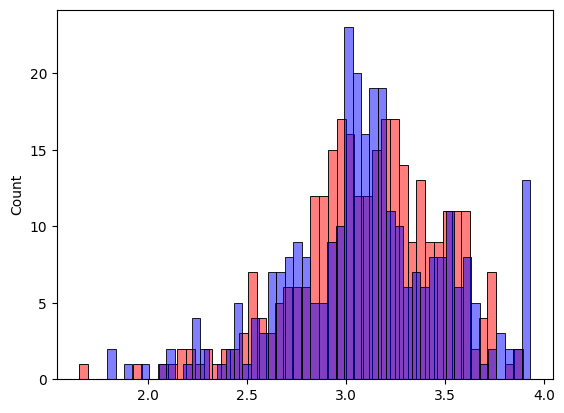

In [18]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [19]:
def rmse(y, y_pred):
    """
    Calculate Root Mean Square Error between actual and predicted values.
    
    Parameters:
    y : numpy array
        Actual values
    y_pred : numpy array
        Predicted values
        
    Returns:
    float: RMSE value
    """
    # Calculate squared error
    se = (y - y_pred) ** 2
    
    # Calculate mean and take square root
    mse = se.mean()
    return np.sqrt(mse)

In [20]:
rmse(y_train, y_pred)

np.float64(0.18060964421204123)

## Validating the model

In [21]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [22]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.19073571053188076)

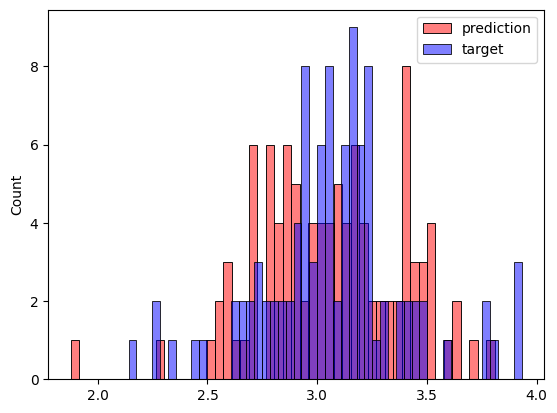

In [23]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Simple Feature Engineering

In [27]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
